In [1]:
#from datasets import *

import matplotlib.pyplot as plt
import numpy as np
from qiskit import BasicAer
from qiskit.ml.datasets import *
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.feature_maps import FirstOrderExpansion
from qiskit.aqua.components.feature_maps import SecondOrderExpansion

# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging
# set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import SPSA

from sklearn.model_selection import train_test_split

import time

import cvxopt
from sklearn.utils import shuffle as utils_shuffle
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

from random import randint

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Import svm model
from sklearn import svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from qiskit.circuit.library import ZZFeatureMap, TwoLocal

from random import *

import seaborn

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from comparator import compareMethods

In [3]:
from qiskit import IBMQ
IBMQ.save_account('b4b2833475002542a2c0897087ddb9957ff2647c7f6331eb13fbcdc3f4c6da5c337488d9aecaee25878ed3b726221559b50f0d0da1ad0d63f2d3eeda42ea5535')
#IBMQ.load_accounts()
#IBMQ.backends()

configrc.store_credentials:WARNING:2020-11-16 17:18:03,261: Credentials already present. Set overwrite=True to overwrite.


In [4]:
En = np.genfromtxt('En.csv', delimiter = ',', usecols=range(1), unpack = True)
van = np.genfromtxt('van.csv', delimiter = ',', usecols=range(1), unpack = True)
gl = np.genfromtxt('gl.csv', delimiter = ',', usecols=range(81), unpack = True)

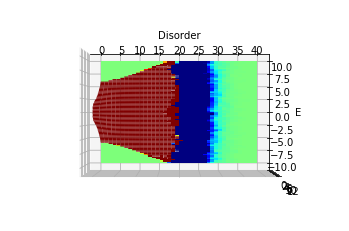

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(van, En)

surf = ax.plot_surface(X, Y, gl, rstride=1, cstride=1, cmap=cm.jet,vmin=-0.000005, vmax=0.000005, antialiased=True)
ax.view_init(azim=-90, elev=90)

ax.set_ylabel('E')
ax.set_xlabel('Disorder')

#Show the plot
plt.show()

In [6]:
def rand(x):
    m = 13093
    b = 5
    a = 6679
    return 1 + ((a*(x)+5) % m)

def inv_rand(y):
    m = 13093
    b = 5
    ainv = 10425
    return ainv * (y - 1 - b) % m

def rand2(x):
    m = 16141
    b = 5
    a = 5059
    return 1 + ((a*(x)+5) % m)

def inv_rand2(y):
    m = 16141
    b = 5
    ainv = 14115
    return ainv * (y - 1 - b) % m

def modInverse(a, m) : 
    a = a % m; 
    for x in range(1, m) : 
        if ((a * x) % m == 1) : 
            return x 
    return 1

#print(modInverse(5059,16141))

In [7]:
delta = 1E-6;

insulator = []
conductor = []

for i in range(0, gl.shape[0]):
    for j in range(0, gl.shape[1]):
        val = gl[i, j]
        if np.abs(val) > delta:
            if (val > 0):
                conductor.append([van[j], En[i]])
            else:
                insulator.append([van[j], En[i]])
                
insulator = np.asarray(insulator)
conductor = np.asarray(conductor)
                
data = []
labels = []

for i in range(0, gl.shape[0]):
    for j in range(0, gl.shape[1]):
        val = gl[i, j]
        if np.abs(val) > delta:
            data.append([En[i], van[j]])            
            if (val > 0):
                labels.append(0)
            else:
                labels.append(1)

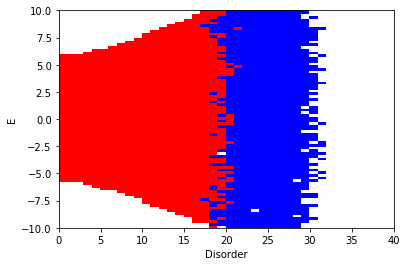

In [30]:
X, Y = np.meshgrid(van, En)

delta = 1E-6;
Z= np.zeros([len(En), len(van)])
for i in range(0, gl.shape[0]):
    for j in range(0, gl.shape[1]):
        val = gl[i, j]
        if np.abs(val) > delta:
            if (val > 0):
                Z[i,j] = 1
            else:
                Z[i,j] = -1    
        else:
            if val == 0  or np.abs(val) < 1e-6:
                Z[i, j] = 0
            else:
                Z[i, j] = np.sign(val) * 0.5
                
plt.pcolor(X, Y, Z, cmap='bwr', vmin=-1, vmax=1)
plt.ylabel('E')
plt.xlabel('Disorder')

plt.savefig('Anderson_classified.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [10]:
all_data = compareMethods(insulator, conductor, backend = BasicAer.get_backend('qasm_simulator'), name="Anderson", include_unscaled=True)

Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,95.07,False
"SVM, Linear Kernel, scaled",Local Processor,0,95.51,False
"SVM, RBF Kernel",Local Processor,0,96.67,False
"SVM, RBF Kernel, scaled",Local Processor,0,96.23,False
QSVM,qasm_simulator,13946,56.52,False
VQC,qasm_simulator,1726,48.12,False


In [11]:
all_data_rand = compareMethods(rand(insulator), rand(conductor), backend = BasicAer.get_backend('qasm_simulator'), name="Anderson_Rand")

Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel, scaled",Local Processor,0,49.28,False
"SVM, RBF Kernel, scaled",Local Processor,0,93.33,False
QSVM,qasm_simulator,13859,54.64,False
VQC,qasm_simulator,1671,52.9,False


In [12]:
#Classical, all data

X_train, x_test, Y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(x_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
model = clf.fit(X_train_std, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_std)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9593613933236574


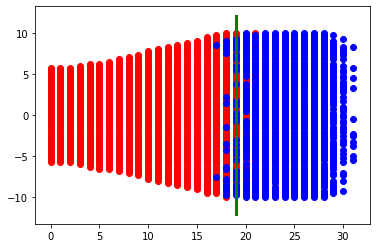

In [13]:
y = np.asarray(labels)
x= np.asarray(data)

X_train, x_test, Y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
model = clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
# Plot data points and color using their class
color = ['red' if c == 1 else 'blue' for c in y]
plt.scatter(conductor[:, 0], conductor[:, 1], color = "red")
plt.scatter(insulator[:, 0], insulator[:, 1], color = "blue")

d = np.array(data)
m = max(d[:, 0])

# Create the hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
#xx = np.arange(0, m, 10)
xx = np.linspace(-12, 12)
yy = a * xx - (clf.intercept_[0]) / w[1]

yint = -(clf.intercept_[0]) / w[1]
slope = a

# Plot the hyperplane
plt.plot(yy, xx, color = "green", linewidth = 3)
plt.show();

In [12]:
#Classical, all data, random

X_train, x_test, Y_train, y_test = train_test_split(rand(np.asarray(data)), labels, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(x_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
model = clf.fit(X_train_std, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_std)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5166908563134979


In [31]:
#Quantum, all data

insulator_train, insulator_test = train_test_split(insulator, test_size=0.33, random_state=42)
conductor_train, conductor_test = train_test_split(conductor, test_size=0.33, random_state=42)

training_data = {'A': np.asarray(insulator_train), 'B': np.asarray(conductor_train)}
test_data = {'A': np.asarray(insulator_test), 'B': np.asarray(conductor_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

result0 = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

print("testing success ratio: {}".format(result0['testing_accuracy']))

9737.693849802017
testing success ratio: 0.5652173913043478


In [15]:
#Quantum, all data, VQC

start = time.time()

conductor_train, conductor_test = train_test_split(insulator, test_size=0.33, random_state=42)
insulator_train, insulator_test = train_test_split(conductor, test_size=0.33, random_state=42)

training_input = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
test_input = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}

total_array = np.concatenate((test_input['A'], test_input['B']))

backend = BasicAer.get_backend('qasm_simulator')
optimizer = SPSA(max_trials=100, c0=4.0, skip_calibration=True)
optimizer.set_options(save_steps=1)
feature_map = ZZFeatureMap(feature_dimension=2, reps=2)
var_form = TwoLocal(2, ['ry', 'rz'], 'cz', reps=3)
vqc = VQC(optimizer, feature_map, var_form, training_input, test_input, total_array)
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10589, seed_transpiler=10598)

result = vqc.run(quantum_instance)

end = time.time()
print(end - start)
print("testing success ratio: ", result['testing_accuracy'])
print("prediction:   {}".format(result['predicted_classes']))

2020-08-29 16:20:25,095:qiskit.aqua.quantum_instance:INFO: 
Qiskit Terra version: 0.15.0
Backend: 'qasm_simulator (BasicAer)', with following setting:
{'basis_gates': ['u1', 'u2', 'u3', 'cx', 'id', 'unitary'], 'coupling_map': None}
{'pass_manager': None, 'initial_layout': None, 'seed_transpiler': 10598, 'optimization_level': None}
RunConfig(max_credits=10, seed_simulator=10589, shots=1024)
{'timeout': None}
{}
{}
Measurement mitigation: None
2020-08-29 16:20:25,096:qiskit.aqua.algorithms.vq_algorithm:INFO: Starting optimizer.
bounds=[(None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None)]
initial point=[ 0.2041066   0.34701816  0.13555038  0.86582933  1.64739344 -0.72837945
  0.37950038  0.89247898  0.19981837 -0.47501367 -0.67773442 -0.31418584
  0.99037304  2.57532404  0.16574072  1.19840775]
2020-08-29 16:48:41,765:qi

1705.0271172523499
testing success ratio:  0.5202898550724637
prediction:   ['B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'A', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'A', 'B', 'A', 'B', 'B', 'B', 'A', 'A', 'B'

In [11]:
#Quantum, all data, VQC, real

start = time.time()

conductor_train, conductor_test = train_test_split(insulator, test_size=0.33, random_state=42)
insulator_train, insulator_test = train_test_split(conductor, test_size=0.33, random_state=42)

training_input = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
test_input = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}

total_array = np.concatenate((test_input['A'], test_input['B']))
from qiskit import IBMQ
IBMQ.save_account('b4b2833475002542a2c0897087ddb9957ff2647c7f6331eb13fbcdc3f4c6da5c337488d9aecaee25878ed3b726221559b50f0d0da1ad0d63f2d3eeda42ea5535')
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_16_melbourne')
optimizer = SPSA(max_trials=100, c0=4.0, skip_calibration=True)
optimizer.set_options(save_steps=1)
feature_map = ZZFeatureMap(feature_dimension=2, reps=2)
var_form = TwoLocal(2, ['ry', 'rz'], 'cz', reps=3)
vqc = VQC(optimizer, feature_map, var_form, training_input, test_input, total_array)
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10589, seed_transpiler=10598)

result = vqc.run(quantum_instance)

end = time.time()
print(end - start)
print("testing success ratio: ", result['testing_accuracy'])
print("prediction:   {}".format(result['predicted_classes']))

configrc.store_credentials:WARNING:2020-09-01 18:35:50,585: Credentials already present. Set overwrite=True to overwrite.
The skip Qobj validation does not work for IBMQ provider. Disable it.
Job limit reached, waiting for job 5f4ecccfcf7ead0012f172de to finish before submitting the next one.
Job limit reached, waiting for job 5f4ecccfcf7ead0012f172de to finish before submitting the next one.
Job limit reached, waiting for job 5f4ecccfcf7ead0012f172de to finish before submitting the next one.
Job limit reached, waiting for job 5f4ecccfcf7ead0012f172de to finish before submitting the next one.
Job limit reached, waiting for job 5f4ecccfcf7ead0012f172de to finish before submitting the next one.
Job limit reached, waiting for job 5f4eccd10301c600121b0dde to finish before submitting the next one.
Job limit reached, waiting for job 5f4eccd20301c600121b0ddf to finish before submitting the next one.
Job limit reached, waiting for job 5f4eccd4c95bcb0014768520 to finish before submitting the ne

Job limit reached, waiting for job 5f4f0db3aceafd00128cf2c9 to finish before submitting the next one.
Job limit reached, waiting for job 5f4f0df2e10fb800132533a4 to finish before submitting the next one.
Job limit reached, waiting for job 5f4f0f333a4af800131ca545 to finish before submitting the next one.
Job limit reached, waiting for job 5f4f0f333a4af800131ca545 to finish before submitting the next one.
Job limit reached, waiting for job 5f4f0f72e74b880014d15d2a to finish before submitting the next one.
Job limit reached, waiting for job 5f4f0fb1aceafd00128cf2e1 to finish before submitting the next one.
Job limit reached, waiting for job 5f4f12b8cf7ead0012f1758d to finish before submitting the next one.
Job limit reached, waiting for job 5f4f1cecc95bcb001476884d to finish before submitting the next one.
Job limit reached, waiting for job 5f4f1cecc95bcb001476884d to finish before submitting the next one.
Job limit reached, waiting for job 5f4f1cecc95bcb001476884d to finish before submi

Job limit reached, waiting for job 5f4f69064b1b4b0019bfeb26 to finish before submitting the next one.
Job limit reached, waiting for job 5f4f69ff699aa1001b42b736 to finish before submitting the next one.
Job limit reached, waiting for job 5f4f6a4066cb4500195c607d to finish before submitting the next one.
Job limit reached, waiting for job 5f4f6a8cb1f7ea001a99d29a to finish before submitting the next one.
Job limit reached, waiting for job 5f4f70e2627494001a6ba358 to finish before submitting the next one.
Job limit reached, waiting for job 5f4f70e2627494001a6ba358 to finish before submitting the next one.
Job limit reached, waiting for job 5f4f70e2627494001a6ba358 to finish before submitting the next one.
Job limit reached, waiting for job 5f4f71154e0466001987f39a to finish before submitting the next one.
Job limit reached, waiting for job 5f4f7148b1f7ea001a99d2d8 to finish before submitting the next one.
Job limit reached, waiting for job 5f4f717c80acf10019f7abb3 to finish before submi

Job limit reached, waiting for job 5f4fa82f66cb4500195c6329 to finish before submitting the next one.
Job limit reached, waiting for job 5f4fa85a627494001a6ba5d3 to finish before submitting the next one.
Job limit reached, waiting for job 5f4fa8dc627494001a6ba5d6 to finish before submitting the next one.
Job limit reached, waiting for job 5f4fa91a4e0466001987f5f8 to finish before submitting the next one.
Job limit reached, waiting for job 5f4fa98580acf10019f7ae37 to finish before submitting the next one.
Job limit reached, waiting for job 5f4fa9c666cb4500195c633d to finish before submitting the next one.
Job limit reached, waiting for job 5f4fac5e80acf10019f7ae4d to finish before submitting the next one.
Job limit reached, waiting for job 5f4fac8cd4bc9e001a8a6807 to finish before submitting the next one.
Job limit reached, waiting for job 5f4fac94627494001a6ba5fc to finish before submitting the next one.
Job limit reached, waiting for job 5f4fad8366cb4500195c635c to finish before submi

FAILURE: job id: 5f4fbd5b8eb5aa0019aecdb3, status: 'FAIL_TO_GET_STATUS' Terra job error: "'524 Server Error:  for url: https://api.quantum-computing.ibm.com/api/Network/ibm-q/Groups/open/Projects/main/Jobs/5f4fbd5b8eb5aa0019aecdb3/status/v/1'"
FAILURE: job id: 5f4fbd5b8eb5aa0019aecdb3, status: 'FAIL_TO_GET_STATUS' Terra job error: "'524 Server Error:  for url: https://api.quantum-computing.ibm.com/api/Network/ibm-q/Groups/open/Projects/main/Jobs/5f4fbd5b8eb5aa0019aecdb3/status/v/1'"
FAILURE: job id: 5f4fbd5b8eb5aa0019aecdb3, status: 'FAIL_TO_GET_STATUS' Terra job error: "'524 Server Error:  for url: https://api.quantum-computing.ibm.com/api/Network/ibm-q/Groups/open/Projects/main/Jobs/5f4fbd5b8eb5aa0019aecdb3/status/v/1'"
FAILURE: job id: 5f4fbd5b8eb5aa0019aecdb3, status: 'FAIL_TO_GET_STATUS' Terra job error: "'524 Server Error:  for url: https://api.quantum-computing.ibm.com/api/Network/ibm-q/Groups/open/Projects/main/Jobs/5f4fbd5b8eb5aa0019aecdb3/status/v/1'"


KeyboardInterrupt: 

In [16]:
#Quantum, all data, VQC, random

start = time.time()

conductor_train, conductor_test = train_test_split(rand(insulator), test_size=0.33, random_state=42)
insulator_train, insulator_test = train_test_split(rand(conductor), test_size=0.33, random_state=42)

training_input = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
test_input = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}

total_array = np.concatenate((test_input['A'], test_input['B']))

backend = BasicAer.get_backend('qasm_simulator')
optimizer = SPSA(max_trials=100, c0=4.0, skip_calibration=True)
optimizer.set_options(save_steps=1)
feature_map = ZZFeatureMap(feature_dimension=2, reps=2)
var_form = TwoLocal(2, ['ry', 'rz'], 'cz', reps=3)
vqc = VQC(optimizer, feature_map, var_form, training_input, test_input, total_array)
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10589, seed_transpiler=10598)

result = vqc.run(quantum_instance)

end = time.time()
print(end - start)
print("testing success ratio: ", result['testing_accuracy'])
print("prediction:   {}".format(result['predicted_classes']))

2020-08-29 16:48:50,129:qiskit.aqua.quantum_instance:INFO: 
Qiskit Terra version: 0.15.0
Backend: 'qasm_simulator (BasicAer)', with following setting:
{'basis_gates': ['u1', 'u2', 'u3', 'cx', 'id', 'unitary'], 'coupling_map': None}
{'pass_manager': None, 'initial_layout': None, 'seed_transpiler': 10598, 'optimization_level': None}
RunConfig(max_credits=10, seed_simulator=10589, shots=1024)
{'timeout': None}
{}
{}
Measurement mitigation: None
2020-08-29 16:48:50,129:qiskit.aqua.algorithms.vq_algorithm:INFO: Starting optimizer.
bounds=[(None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None)]
initial point=[ 1.30223862 -0.26049241 -0.20809114 -1.46514031 -0.48489495  1.58783002
  0.09783672 -0.54292135 -0.79558498 -0.70163051 -1.02988977 -0.45793338
  0.14689495 -1.71328888  0.38423124 -2.02542308]
2020-08-29 17:17:17,843:qi

1716.1425659656525
testing success ratio:  0.49420289855072463
prediction:   ['A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'A', 'A', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'B

In [32]:
#Quantum, all data, random

insulator_train, insulator_test = train_test_split(rand(insulator), test_size=0.33, random_state=42)
conductor_train, conductor_test = train_test_split(rand(conductor), test_size=0.33, random_state=42)

training_data = {'A': np.asarray(insulator_train), 'B': np.asarray(conductor_train)}
test_data = {'A': np.asarray(insulator_test), 'B': np.asarray(conductor_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

result1 = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

print("testing success ratio: {}".format(result1['testing_accuracy']))

10072.467880010605
testing success ratio: 0.5463768115942029


In [14]:
#Epsilon is the distance from the classical hyperplane
epsilon = 2.1
conductor_red = []
insulator_red = []

def linedist(x0, y0, a, b, c):
    return np.abs(a*x0+b*y0+c)/np.sqrt(a**2+b**2)

for i in range(0, len(data)):
    d = linedist(data[i][0], data[i][1], slope, -1.0, yint)
    #print(d)
    if d <= epsilon:
        if (labels[i] == 1):
            conductor_red.append(data[i])
        else:
            insulator_red.append(data[i])
                    
conductor_red = np.asarray(conductor_red)
insulator_red = np.asarray(insulator_red)

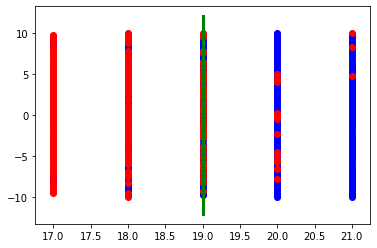

In [15]:
plt.scatter(conductor_red[:, 1], conductor_red[:, 0], color = "blue")
plt.scatter(insulator_red[:, 1], insulator_red[:, 0], color = "red")
plt.plot(yy, xx, color = "green", linewidth = 3)
plt.show();

In [16]:
red_data = compareMethods(insulator_red, conductor_red, name="Anderson_Reduced", include_unscaled=True)

Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,76.69,False
"SVM, Linear Kernel, scaled",Local Processor,0,78.2,False
"SVM, RBF Kernel",Local Processor,0,79.7,False
"SVM, RBF Kernel, scaled",Local Processor,0,77.44,False
QSVM,qasm_simulator,481,54.14,False
VQC,qasm_simulator,316,52.63,False


In [17]:
red_data_rand = compareMethods(rand(insulator_red), rand(conductor_red), name="Anderson_Reduced_Rand", include_unscaled=True)

Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,19,45.11,False
"SVM, Linear Kernel, scaled",Local Processor,0,50.38,False
"SVM, RBF Kernel",Local Processor,0,51.13,True
"SVM, RBF Kernel, scaled",Local Processor,0,60.15,False
QSVM,qasm_simulator,473,60.15,False
VQC,qasm_simulator,315,62.41,False


In [12]:
#Classical, reduced data
data_red = []
labels_red = []

for i in range(0, len(conductor_red)):
    data_red.append(conductor_red[i])
    labels_red.append(0)

for i in range(0, len(insulator_red)):
    data_red.append(insulator_red[i])
    labels_red.append(1)

X_train, x_test, Y_train, y_test = train_test_split(data_red, labels_red, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(x_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
model = clf.fit(X_train_std, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_std)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.803030303030303


In [13]:
#Classical, reduced data, random

X_train, x_test, Y_train, y_test = train_test_split(rand(np.asarray(data_red)), labels_red, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(x_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
model = clf.fit(X_train_std, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_std)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4772727272727273


In [37]:
#Quantum, reduced data

insulator_train, insulator_test = train_test_split(insulator_red, test_size=0.33, random_state=42)
conductor_train, conductor_test = train_test_split(conductor_red, test_size=0.33, random_state=42)

training_data = {'A': np.asarray(insulator_train), 'B': np.asarray(conductor_train)}
test_data = {'A': np.asarray(insulator_test), 'B': np.asarray(conductor_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

result2 = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

print("testing success ratio: {}".format(result2['testing_accuracy']))

358.74104166030884
testing success ratio: 0.5413533834586466


In [38]:
#Quantum, reduced data, real 5 qubit

#insulator_train, insulator_test = train_test_split(insulator_red, test_size=0.33, random_state=42)
#conductor_train, conductor_test = train_test_split(conductor_red, test_size=0.33, random_state=42)

#training_data = {'A': np.asarray(insulator_train), 'B': np.asarray(conductor_train)}
#test_data = {'A': np.asarray(insulator_test), 'B': np.asarray(conductor_test)}

#total_array = np.concatenate((test_data['A'], test_data['B']))

#start = time.time()

#feature_map = SecondOrderExpansion(feature_dimension=2, depth=2, entanglement='linear')
#qsvm = QSVM(feature_map, training_data, test_data)

#backend = IBMQ.get_backend('ibmq_london')
#quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598, skip_qobj_validation=False)

#result2a = qsvm.run(quantum_instance)

#end = time.time()
#print(end - start)

#print("testing success ratio: {}".format(result2a['testing_accuracy']))

In [100]:
#Quantum, reduced data, random

insulator_train, insulator_test = train_test_split(rand(insulator_red), test_size=0.33, random_state=42)
conductor_train, conductor_test = train_test_split(rand(conductor_red), test_size=0.33, random_state=42)

training_data = {'A': np.asarray(insulator_train), 'B': np.asarray(conductor_train)}
test_data = {'A': np.asarray(insulator_test), 'B': np.asarray(conductor_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data, total_array)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

result3 = qsvm.run(quantum_instance)



end = time.time()
print(end - start)

print("testing success ratio: {}".format(result3['testing_accuracy']))
print("prediction:   {}".format(result3['predicted_classes']))

514.6372122764587
testing success ratio: 0.6015037593984962
prediction:   ['B', 'A', 'B', 'A', 'B', 'B', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'B']


In [97]:
qsvm.save_model('C:\\Users\\admin\\Desktop\\QQML\\Code\\Saved_SVMs\\test')

In [95]:
qsvm.load_model('C:\\Users\\admin\\Desktop\\QQML\\Code\\Saved_SVMs\\test.npz')
qsvm.predict(total_array)

In [99]:
(total_array)

array([[2.285500e+03, 2.391000e+03],
       [1.036925e+04, 2.391000e+03],
       [6.000000e+00, 2.656000e+03],
       [6.950000e+03, 9.070000e+03],
       [9.494500e+03, 2.391000e+03],
       [1.142925e+04, 2.391000e+03],
       [7.215000e+03, 9.070000e+03],
       [8.884750e+03, 2.391000e+03],
       [2.205750e+03, 9.070000e+03],
       [9.149750e+03, 2.391000e+03],
       [6.075250e+03, 8.805000e+03],
       [1.055450e+04, 8.805000e+03],
       [7.824750e+03, 2.391000e+03],
       [4.140500e+03, 2.391000e+03],
       [1.116425e+04, 2.656000e+03],
       [3.875500e+03, 2.656000e+03],
       [3.955250e+03, 2.391000e+03],
       [4.750250e+03, 8.805000e+03],
       [6.420000e+03, 2.391000e+03],
       [5.360000e+02, 9.070000e+03],
       [4.485250e+03, 8.805000e+03],
       [1.675750e+03, 8.805000e+03],
       [6.000000e+00, 2.391000e+03],
       [1.230400e+04, 2.391000e+03],
       [8.964500e+03, 9.070000e+03],
       [2.285500e+03, 9.070000e+03],
       [1.222425e+04, 9.070000e+03],
 

In [15]:
#Quantum, reduced data, random

insulator_train, insulator_test = train_test_split(rand(insulator_red), test_size=0.33, random_state=42)
conductor_train, conductor_test = train_test_split(rand(conductor_red), test_size=0.33, random_state=42)

training_data = {'A': np.asarray(insulator_train), 'B': np.asarray(conductor_train)}
test_data = {'A': np.asarray(insulator_test), 'B': np.asarray(conductor_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_16_melbourne')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598, skip_qobj_validation=False, wait = 60)
result3a = qsvm.run(quantum_instance)

qsvm.save_model('C:\\Users\\admin\\Desktop\\QQML\\Code\\Saved_SVMs\\anderson_red_rand_real16')

end = time.time()
print(end - start)

print("testing success ratio: {}".format(result3a['testing_accuracy']))

2020-08-06 22:49:47,078:qiskit.aqua.quantum_instance:INFO: 
Qiskit Terra version: 0.15.0
Backend: 'ibmq_16_melbourne (<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>)', with following setting:
{'basis_gates': ['id', 'u1', 'u2', 'u3', 'cx'], 'coupling_map': [[0, 1], [0, 14], [1, 0], [1, 2], [1, 13], [2, 1], [2, 3], [2, 12], [3, 2], [3, 4], [3, 11], [4, 3], [4, 5], [4, 10], [5, 4], [5, 6], [5, 9], [6, 5], [6, 8], [7, 8], [8, 6], [8, 7], [8, 9], [9, 5], [9, 8], [9, 10], [10, 4], [10, 9], [10, 11], [11, 3], [11, 10], [11, 12], [12, 2], [12, 11], [12, 13], [13, 1], [13, 12], [13, 14], [14, 0], [14, 13]]}
{'pass_manager': None, 'initial_layout': None, 'seed_transpiler': 10598, 'optimization_level': None}
RunConfig(max_credits=10, seed_simulator=10598, shots=1024)
{'timeout': None, 'wait': 60}
{}
{}
Measurement mitigation: None
2020-08-06 22:49:53,842:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2cc039f0563e001a6ccd12 to finish before subm

2020-08-06 23:18:58,148:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2cc6d8c79cc2001a3ad934 to finish before submitting the next one.
2020-08-06 23:19:50,008:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2cc6da0927b800133fa93d to finish before submitting the next one.
2020-08-06 23:20:40,294:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2cc7b7159e2600136cce6f to finish before submitting the next one.
2020-08-06 23:23:24,475:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2cc7e95b470a00125d57ba to finish before submitting the next one.
2020-08-06 23:24:15,133:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2cc81c4ae7da001b3753c6 to finish before submitting the next one.
2020-08-06 23:25:15,863:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2cc8509b21aa001a1cbac4 to finish before submitting the next one.
2020

2020-08-06 23:46:00,174:qiskit.aqua.utils.run_circuits:INFO: Running 1-th qobj, job id: 5f2ccb840927b800133fa971
2020-08-06 23:46:01,154:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 1-th qobj, job id: 5f2ccb840927b800133fa971
2020-08-06 23:46:01,158:qiskit.aqua.utils.run_circuits:INFO: Running 2-th qobj, job id: 5f2ccb864ae7da001b3753ea
2020-08-06 23:46:02,323:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 2-th qobj, job id: 5f2ccb864ae7da001b3753ea
2020-08-06 23:46:02,326:qiskit.aqua.utils.run_circuits:INFO: Running 3-th qobj, job id: 5f2ccb87159e2600136cce99
2020-08-06 23:46:03,474:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 3-th qobj, job id: 5f2ccb87159e2600136cce99
2020-08-06 23:46:03,476:qiskit.aqua.utils.run_circuits:INFO: Running 4-th qobj, job id: 5f2ccb89f0563e001a6ccd93
2020-08-06 23:46:04,507:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 4-th qobj, job id: 5f2ccb89f0563e001a6ccd93
2020-08-06 23:46:04,510:qiskit.aqua.utils.run_circuits:INFO: Running 5-t

2020-08-07 00:05:28,096:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2cd10d0927b800133fa9ad, status: JobStatus.RUNNING
2020-08-07 00:06:29,323:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 9-th qobj, job id: 5f2cd10d0927b800133fa9ad
2020-08-07 00:06:29,326:qiskit.aqua.utils.run_circuits:INFO: Running 10-th qobj, job id: 5f2cd18b4ae7da001b37542e
2020-08-07 00:06:29,610:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2cd18b4ae7da001b37542e is queued at position 4
2020-08-07 00:07:29,908:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2cd18b4ae7da001b37542e is queued at position 3
2020-08-07 00:08:30,222:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2cd18b4ae7da001b37542e is queued at position 2
2020-08-07 00:09:30,575:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2cd18b4ae7da001b37542e is queued at position 1
2020-08-07 00:10:30,903:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2cd18b4ae7da001b37542e, status: JobStatus.RUNNING
2020-08-07 00:11:32,136:qiskit.aqua.utils.run_circuit

2020-08-07 00:52:22,188:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2cdae94ae7da001b375491 is queued at position 1
2020-08-07 00:53:22,539:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2cdae94ae7da001b375491, status: JobStatus.RUNNING
2020-08-07 00:54:22,870:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2cdae94ae7da001b375491, status: JobStatus.RUNNING
2020-08-07 00:55:23,175:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2cdae94ae7da001b375491, status: JobStatus.RUNNING
2020-08-07 00:56:23,516:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2cdae94ae7da001b375491, status: JobStatus.RUNNING
2020-08-07 00:57:24,644:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 10-th qobj, job id: 5f2cdae94ae7da001b375491
2020-08-07 00:57:24,647:qiskit.aqua.utils.run_circuits:INFO: Running 11-th qobj, job id: 5f2cdb5fcbff540019b44000
2020-08-07 00:57:24,949:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2cdb5fcbff540019b44000, status: JobStatus.RUNNING
2020-08-07 00:58:25,707:qiskit.aqua.utils.r

2020-08-07 01:49:59,951:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2ce7d1252dfd001a345e9e is queued at position 6
2020-08-07 01:51:00,330:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2ce7d1252dfd001a345e9e is queued at position 5
2020-08-07 01:52:00,666:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2ce7d1252dfd001a345e9e is queued at position 4
2020-08-07 01:53:00,971:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2ce7d1252dfd001a345e9e is queued at position 4
2020-08-07 01:54:01,332:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2ce7d1252dfd001a345e9e is queued at position 4
2020-08-07 01:55:01,708:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2ce7d1252dfd001a345e9e is queued at position 2
2020-08-07 01:56:02,040:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2ce7d1252dfd001a345e9e is queued at position 1
2020-08-07 01:57:02,798:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2ce7d1252dfd001a345e9e, status: JobStatus.RUNNING
2020-08-07 01:58:03,165:qiskit.aqua.utils.run_circuit

2020-08-07 02:55:24,657:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2cf900cc0ccf001946d82f is queued at position 10
2020-08-07 02:56:24,973:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2cf900cc0ccf001946d82f is queued at position 8
2020-08-07 02:57:25,292:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2cf900cc0ccf001946d82f is queued at position 8
2020-08-07 02:58:25,609:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2cf900cc0ccf001946d82f is queued at position 8
2020-08-07 02:59:25,923:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2cf900cc0ccf001946d82f is queued at position 8
2020-08-07 03:00:26,276:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2cf900cc0ccf001946d82f is queued at position 8
2020-08-07 03:01:26,631:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2cf900cc0ccf001946d82f is queued at position 7
2020-08-07 03:02:26,924:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2cf900cc0ccf001946d82f is queued at position 7
2020-08-07 03:03:27,231:qiskit.aqua.utils.run_circuits:

2020-08-07 03:40:30,359:qiskit.aqua.utils.run_circuits:INFO: Running 5-th qobj, job id: 5f2d0388385d440019c41f63
2020-08-07 03:40:31,307:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 5-th qobj, job id: 5f2d0388385d440019c41f63
2020-08-07 03:40:31,311:qiskit.aqua.utils.run_circuits:INFO: Running 6-th qobj, job id: 5f2d03bb5e084e001ae141a1
2020-08-07 03:40:32,392:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 6-th qobj, job id: 5f2d03bb5e084e001ae141a1
2020-08-07 03:40:32,396:qiskit.aqua.utils.run_circuits:INFO: Running 7-th qobj, job id: 5f2d03ef252dfd001a34600d
2020-08-07 03:40:33,293:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 7-th qobj, job id: 5f2d03ef252dfd001a34600d
2020-08-07 03:40:33,297:qiskit.aqua.utils.run_circuits:INFO: Running 8-th qobj, job id: 5f2d0422a86d70001adf84ac
2020-08-07 03:40:34,263:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 8-th qobj, job id: 5f2d0422a86d70001adf84ac
2020-08-07 03:40:34,266:qiskit.aqua.utils.run_circuits:INFO: Running 9-t

2020-08-07 04:02:56,114:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 11-th qobj, job id: 5f2d094a5e084e001ae14202
2020-08-07 04:02:56,118:qiskit.aqua.utils.run_circuits:INFO: Running 12-th qobj, job id: 5f2d097e1676e8001ac07a3c
2020-08-07 04:02:56,365:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2d097e1676e8001ac07a3c, status: JobStatus.RUNNING
2020-08-07 04:03:57,676:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 12-th qobj, job id: 5f2d097e1676e8001ac07a3c
2020-08-07 04:03:57,678:qiskit.aqua.utils.run_circuits:INFO: Running 13-th qobj, job id: 5f2d09b099148e001912e511
2020-08-07 04:03:58,682:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 13-th qobj, job id: 5f2d09b099148e001912e511
2020-08-07 04:04:10,758:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d0af1a86d70001adf852d to finish before submitting the next one.
2020-08-07 04:05:54,988:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d0af35cf07d001943f591 t

2020-08-07 04:46:32,469:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d10281676e8001ac07ac0 to finish before submitting the next one.
2020-08-07 04:51:34,031:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d10281676e8001ac07ac0 to finish before submitting the next one.
2020-08-07 04:56:35,734:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d10281676e8001ac07ac0 to finish before submitting the next one.
2020-08-07 05:01:37,343:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d10281676e8001ac07ac0 to finish before submitting the next one.
2020-08-07 05:06:38,896:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d10281676e8001ac07ac0 to finish before submitting the next one.
2020-08-07 05:11:40,975:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d10281676e8001ac07ac0 to finish before submitting the next one.
2020

2020-08-07 06:40:18,991:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2d2e5699148e001912e720, status: JobStatus.RUNNING
2020-08-07 06:41:20,320:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 10-th qobj, job id: 5f2d2e5699148e001912e720
2020-08-07 06:41:20,324:qiskit.aqua.utils.run_circuits:INFO: Running 11-th qobj, job id: 5f2d2ea7a86d70001adf8738
2020-08-07 06:41:20,623:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2d2ea7a86d70001adf8738, status: JobStatus.RUNNING
2020-08-07 06:42:21,760:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 11-th qobj, job id: 5f2d2ea7a86d70001adf8738
2020-08-07 06:42:21,760:qiskit.aqua.utils.run_circuits:INFO: Running 12-th qobj, job id: 5f2d2eda764208001a73dc94
2020-08-07 06:42:22,121:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2d2eda764208001a73dc94, status: JobStatus.RUNNING
2020-08-07 06:43:23,323:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 12-th qobj, job id: 5f2d2eda764208001a73dc94
2020-08-07 06:43:23,327:qiskit.aqua.utils.run_cir

2020-08-07 07:07:19,613:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d35175cf07d001943f81a to finish before submitting the next one.
2020-08-07 07:09:53,052:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d354a764208001a73dcee to finish before submitting the next one.
2020-08-07 07:10:43,246:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d357e252dfd001a3462de to finish before submitting the next one.
2020-08-07 07:12:57,208:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d35b1385d440019c42247 to finish before submitting the next one.
2020-08-07 07:13:46,898:qiskit.aqua.utils.run_circuits:INFO: Backend status: <qiskit.providers.models.backendstatus.BackendStatus object at 0x000001AB5ED38080>
2020-08-07 07:13:46,902:qiskit.aqua.utils.run_circuits:INFO: There are 14 jobs are submitted.
2020-08-07 07:13:46,904:qiskit.aqua.utils.run_circuits:INFO: All job ids:
['5f2d34

2020-08-07 07:33:29,520:qiskit.aqua.utils.run_circuits:INFO: Running 3-th qobj, job id: 5f2d38eccc0ccf001946dbff
2020-08-07 07:33:30,755:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 3-th qobj, job id: 5f2d38eccc0ccf001946dbff
2020-08-07 07:33:30,759:qiskit.aqua.utils.run_circuits:INFO: Running 4-th qobj, job id: 5f2d38ee1676e8001ac07d0c
2020-08-07 07:33:31,821:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 4-th qobj, job id: 5f2d38ee1676e8001ac07d0c
2020-08-07 07:33:31,824:qiskit.aqua.utils.run_circuits:INFO: Running 5-th qobj, job id: 5f2d39b45cf07d001943f86b
2020-08-07 07:33:32,959:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 5-th qobj, job id: 5f2d39b45cf07d001943f86b
2020-08-07 07:33:32,961:qiskit.aqua.utils.run_circuits:INFO: Running 6-th qobj, job id: 5f2d39e7252dfd001a34631c
2020-08-07 07:33:34,179:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 6-th qobj, job id: 5f2d39e7252dfd001a34631c
2020-08-07 07:33:34,183:qiskit.aqua.utils.run_circuits:INFO: Running 7-t

2020-08-07 08:09:06,432:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 5-th qobj, job id: 5f2d4253252dfd001a3463a7
2020-08-07 08:09:06,436:qiskit.aqua.utils.run_circuits:INFO: Running 6-th qobj, job id: 5f2d42865e084e001ae1453b
2020-08-07 08:09:07,565:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 6-th qobj, job id: 5f2d42865e084e001ae1453b
2020-08-07 08:09:07,567:qiskit.aqua.utils.run_circuits:INFO: Running 7-th qobj, job id: 5f2d42b9764208001a73ddb7
2020-08-07 08:09:08,487:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 7-th qobj, job id: 5f2d42b9764208001a73ddb7
2020-08-07 08:09:08,489:qiskit.aqua.utils.run_circuits:INFO: Running 8-th qobj, job id: 5f2d42ec75f180001a56cfc0
2020-08-07 08:09:09,497:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 8-th qobj, job id: 5f2d42ec75f180001a56cfc0
2020-08-07 08:09:09,499:qiskit.aqua.utils.run_circuits:INFO: Running 9-th qobj, job id: 5f2d431f1676e8001ac07da2
2020-08-07 08:09:09,766:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2

2020-08-07 08:33:10,420:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2d48a0764208001a73de05, status: JobStatus.RUNNING
2020-08-07 08:34:11,829:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 11-th qobj, job id: 5f2d48a0764208001a73de05
2020-08-07 08:34:11,833:qiskit.aqua.utils.run_circuits:INFO: Running 12-th qobj, job id: 5f2d48d3a86d70001adf88b9
2020-08-07 08:34:13,113:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 12-th qobj, job id: 5f2d48d3a86d70001adf88b9
2020-08-07 08:34:13,116:qiskit.aqua.utils.run_circuits:INFO: Running 13-th qobj, job id: 5f2d49055cf07d001943f942
2020-08-07 08:34:13,430:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2d49055cf07d001943f942 is queued at position 1
2020-08-07 08:35:14,613:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 13-th qobj, job id: 5f2d49055cf07d001943f942
2020-08-07 08:35:27,177:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d4a8575f180001a56d016 to finish before submitting the next one.
2020-08

2020-08-07 09:04:21,466:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d4ff75cf07d001943f99d to finish before submitting the next one.
2020-08-07 09:05:13,966:qiskit.aqua.utils.run_circuits:INFO: Backend status: <qiskit.providers.models.backendstatus.BackendStatus object at 0x000001AB5DD4A4A8>
2020-08-07 09:05:13,968:qiskit.aqua.utils.run_circuits:INFO: There are 14 jobs are submitted.
2020-08-07 09:05:13,970:qiskit.aqua.utils.run_circuits:INFO: All job ids:
['5f2d4eca764208001a73de5a', '5f2d4ecccc0ccf001946dd0d', '5f2d4ece764208001a73de5b', '5f2d4ed05e084e001ae145d5', '5f2d4ed275f180001a56d04e', '5f2d4f605cf07d001943f997', '5f2d4f93385d440019c4239a', '5f2d4fc5252dfd001a346438', '5f2d4ff75cf07d001943f99d', '5f2d502b5e084e001ae145ea', '5f2d50ce385d440019c423a9', '5f2d511e75f180001a56d06a', '5f2d515299148e001912e908', '5f2d5188252dfd001a34644b']
2020-08-07 09:05:13,972:qiskit.aqua.utils.run_circuits:INFO: Running 0-th qobj, job id: 5f2d4eca764208001a73de5a


2020-08-07 10:40:21,024:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d5428764208001a73de93 to finish before submitting the next one.
2020-08-07 10:45:22,819:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d5428764208001a73de93 to finish before submitting the next one.
2020-08-07 10:50:24,434:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d5428764208001a73de93 to finish before submitting the next one.
2020-08-07 10:55:26,039:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d5428764208001a73de93 to finish before submitting the next one.
2020-08-07 11:00:27,964:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d5428764208001a73de93 to finish before submitting the next one.
2020-08-07 11:05:30,412:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d5428764208001a73de93 to finish before submitting the next one.
2020

2020-08-07 13:20:00,911:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 7-th qobj, job id: 5f2d548f1676e8001ac07e5c
2020-08-07 13:20:00,913:qiskit.aqua.utils.run_circuits:INFO: Running 8-th qobj, job id: 5f2d54bf75f180001a56d08f
2020-08-07 13:20:02,249:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 8-th qobj, job id: 5f2d54bf75f180001a56d08f
2020-08-07 13:20:02,253:qiskit.aqua.utils.run_circuits:INFO: Running 9-th qobj, job id: 5f2d54f3cc0ccf001946dd50
2020-08-07 13:20:02,556:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2d54f3cc0ccf001946dd50, status: JobStatus.RUNNING
2020-08-07 13:21:04,101:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 9-th qobj, job id: 5f2d54f3cc0ccf001946dd50
2020-08-07 13:21:04,104:qiskit.aqua.utils.run_circuits:INFO: Running 10-th qobj, job id: 5f2d8c9e5cf07d001943fc61
2020-08-07 13:21:04,438:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2d8c9e5cf07d001943fc61 is queued at position 19
2020-08-07 13:22:04,767:qiskit.aqua.utils.run_circuits:INFO: Jo

2020-08-07 13:49:38,431:qiskit.aqua.utils.run_circuits:INFO: Running 11-th qobj, job id: 5f2d920775f180001a56d37b
2020-08-07 13:49:38,775:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2d920775f180001a56d37b, status: JobStatus.RUNNING
2020-08-07 13:50:40,034:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 11-th qobj, job id: 5f2d920775f180001a56d37b
2020-08-07 13:50:40,037:qiskit.aqua.utils.run_circuits:INFO: Running 12-th qobj, job id: 5f2d923a5e084e001ae148fc
2020-08-07 13:50:41,472:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 12-th qobj, job id: 5f2d923a5e084e001ae148fc
2020-08-07 13:50:41,473:qiskit.aqua.utils.run_circuits:INFO: Running 13-th qobj, job id: 5f2d927aa86d70001adf8c51
2020-08-07 13:50:41,728:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2d927aa86d70001adf8c51, status: JobStatus.RUNNING
2020-08-07 13:51:43,113:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 13-th qobj, job id: 5f2d927aa86d70001adf8c51
2020-08-07 13:51:56,523:qiskit.aqua.utils.run_circuits:W

2020-08-07 14:23:25,000:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d9a9b1676e8001ac081d4 to finish before submitting the next one.
2020-08-07 14:27:00,001:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d9acd75f180001a56d40a to finish before submitting the next one.
2020-08-07 14:32:02,124:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d9acd75f180001a56d40a to finish before submitting the next one.
2020-08-07 14:37:04,187:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d9acd75f180001a56d40a to finish before submitting the next one.
2020-08-07 14:42:06,145:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d9acd75f180001a56d40a to finish before submitting the next one.
2020-08-07 14:47:07,901:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2d9acd75f180001a56d40a to finish before submitting the next one.
2020

2020-08-07 16:24:49,646:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 11-th qobj, job id: 5f2db6b15e084e001ae14a93
2020-08-07 16:24:49,649:qiskit.aqua.utils.run_circuits:INFO: Running 12-th qobj, job id: 5f2db6e45e084e001ae14a96
2020-08-07 16:24:49,858:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2db6e45e084e001ae14a96, status: JobStatus.RUNNING
2020-08-07 16:25:51,140:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 12-th qobj, job id: 5f2db6e45e084e001ae14a96
2020-08-07 16:25:51,144:qiskit.aqua.utils.run_circuits:INFO: Running 13-th qobj, job id: 5f2db7171676e8001ac0830e
2020-08-07 16:25:51,492:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2db7171676e8001ac0830e, status: JobStatus.RUNNING
2020-08-07 16:26:52,692:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 13-th qobj, job id: 5f2db7171676e8001ac0830e
2020-08-07 16:27:05,346:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2db90e75f180001a56d530 to finish before submitting the next one.
2020

2020-08-07 16:58:36,606:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2dbf8f5e084e001ae14b01 to finish before submitting the next one.
2020-08-07 17:02:19,813:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2dbfc2cc0ccf001946e25e to finish before submitting the next one.
2020-08-07 17:03:09,489:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2dbff499148e001912ee3f to finish before submitting the next one.
2020-08-07 17:03:59,704:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2dc046385d440019c428db to finish before submitting the next one.
2020-08-07 17:05:29,566:qiskit.aqua.utils.run_circuits:INFO: Backend status: <qiskit.providers.models.backendstatus.BackendStatus object at 0x000001AB5DE62048>
2020-08-07 17:05:29,570:qiskit.aqua.utils.run_circuits:INFO: There are 14 jobs are submitted.
2020-08-07 17:05:29,572:qiskit.aqua.utils.run_circuits:INFO: All job ids:
['5f2dbe

2020-08-07 17:27:48,113:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 2-th qobj, job id: 5f2dc3d6cc0ccf001946e297
2020-08-07 17:27:48,117:qiskit.aqua.utils.run_circuits:INFO: Running 3-th qobj, job id: 5f2dc3d7cc0ccf001946e298
2020-08-07 17:27:49,148:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 3-th qobj, job id: 5f2dc3d7cc0ccf001946e298
2020-08-07 17:27:49,150:qiskit.aqua.utils.run_circuits:INFO: Running 4-th qobj, job id: 5f2dc3d9cc0ccf001946e299
2020-08-07 17:27:50,257:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 4-th qobj, job id: 5f2dc3d9cc0ccf001946e299
2020-08-07 17:27:50,259:qiskit.aqua.utils.run_circuits:INFO: Running 5-th qobj, job id: 5f2dc4eb252dfd001a3469cb
2020-08-07 17:27:51,328:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 5-th qobj, job id: 5f2dc4eb252dfd001a3469cb
2020-08-07 17:27:51,332:qiskit.aqua.utils.run_circuits:INFO: Running 6-th qobj, job id: 5f2dc51dcc0ccf001946e2a5
2020-08-07 17:27:52,289:qiskit.aqua.utils.run_circuits:INFO: COMPLETED t

2020-08-07 17:52:55,739:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2dcc555cf07d001943ffb7 is queued at position 7
2020-08-07 17:53:56,147:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2dcc555cf07d001943ffb7 is queued at position 4
2020-08-07 17:54:56,556:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2dcc555cf07d001943ffb7 is queued at position 2
2020-08-07 17:55:56,926:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2dcc555cf07d001943ffb7, status: JobStatus.RUNNING
2020-08-07 17:56:58,230:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 10-th qobj, job id: 5f2dcc555cf07d001943ffb7
2020-08-07 17:56:58,234:qiskit.aqua.utils.run_circuits:INFO: Running 11-th qobj, job id: 5f2dcc87252dfd001a346a26
2020-08-07 17:56:58,432:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2dcc87252dfd001a346a26, status: JobStatus.RUNNING
2020-08-07 17:57:59,860:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 11-th qobj, job id: 5f2dcc87252dfd001a346a26
2020-08-07 17:57:59,864:qiskit.aqua.utils.run_circ

2020-08-07 18:25:37,878:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2dd3b65cf07d0019440016 to finish before submitting the next one.
2020-08-07 18:26:27,037:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2dd3b899148e001912ef52 to finish before submitting the next one.
2020-08-07 18:27:18,203:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2dd479385d440019c42a01 to finish before submitting the next one.
2020-08-07 18:31:47,004:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2dd4aba86d70001adf8f92 to finish before submitting the next one.
2020-08-07 18:32:37,743:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2dd4de75f180001a56d6b9 to finish before submitting the next one.
2020-08-07 18:33:27,380:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2dd50f75f180001a56d6bb to finish before submitting the next one.
2020

2020-08-07 19:07:43,217:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2dd682385d440019c42a1a is queued at position 1
2020-08-07 19:08:43,544:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2dd682385d440019c42a1a is queued at position 1
2020-08-07 19:09:43,926:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2dd682385d440019c42a1a is queued at position 1
2020-08-07 19:10:44,242:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2dd682385d440019c42a1a is queued at position 1
2020-08-07 19:11:44,574:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2dd682385d440019c42a1a is queued at position 1
2020-08-07 19:12:44,880:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2dd682385d440019c42a1a is queued at position 1
2020-08-07 19:13:45,229:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2dd682385d440019c42a1a is queued at position 1
2020-08-07 19:14:45,565:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2dd682385d440019c42a1a is queued at position 1
2020-08-07 19:15:45,882:qiskit.aqua.utils.run_circuits:I

2020-08-07 20:18:07,210:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2dd682385d440019c42a1a is queued at position 1
2020-08-07 20:19:07,642:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2dd682385d440019c42a1a is queued at position 1
2020-08-07 20:20:08,020:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2dd682385d440019c42a1a is queued at position 1
2020-08-07 20:21:08,338:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2dd682385d440019c42a1a is queued at position 1
2020-08-07 20:22:08,656:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2dd682385d440019c42a1a is queued at position 1
2020-08-07 20:23:08,961:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2dd682385d440019c42a1a is queued at position 1
2020-08-07 20:24:09,277:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2dd682385d440019c42a1a is queued at position 1
2020-08-07 20:25:09,582:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2dd682385d440019c42a1a is queued at position 1
2020-08-07 20:26:09,884:qiskit.aqua.utils.run_circuits:I

2020-08-07 20:55:45,756:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2df723252dfd001a346c0a is queued at position 4
2020-08-07 20:56:46,079:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2df723252dfd001a346c0a is queued at position 1
2020-08-07 20:57:46,398:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2df723252dfd001a346c0a, status: JobStatus.RUNNING
2020-08-07 20:58:47,663:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 10-th qobj, job id: 5f2df723252dfd001a346c0a
2020-08-07 20:58:47,665:qiskit.aqua.utils.run_circuits:INFO: Running 11-th qobj, job id: 5f2df7561676e8001ac0862e
2020-08-07 20:58:47,988:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2df7561676e8001ac0862e, status: JobStatus.RUNNING
2020-08-07 20:59:49,332:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 11-th qobj, job id: 5f2df7561676e8001ac0862e
2020-08-07 20:59:49,335:qiskit.aqua.utils.run_circuits:INFO: Running 12-th qobj, job id: 5f2df7885cf07d00194401b0
2020-08-07 20:59:49,707:qiskit.aqua.utils.run_circuits

2020-08-07 21:28:33,470:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2dfedfcc0ccf001946e572 to finish before submitting the next one.
2020-08-07 21:29:22,876:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2dfee15e084e001ae14dee to finish before submitting the next one.
2020-08-07 21:30:15,659:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2dfee3385d440019c42c09 to finish before submitting the next one.
2020-08-07 21:31:05,623:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2dff8999148e001912f14a to finish before submitting the next one.
2020-08-07 21:34:11,255:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2dffbd385d440019c42c18 to finish before submitting the next one.
2020-08-07 21:35:02,165:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2dffef385d440019c42c1b to finish before submitting the next one.
2020

2020-08-07 21:56:04,277:qiskit.aqua.utils.run_circuits:INFO: Running 1-th qobj, job id: 5f2e032875f180001a56d8f0
2020-08-07 21:56:05,426:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 1-th qobj, job id: 5f2e032875f180001a56d8f0
2020-08-07 21:56:05,430:qiskit.aqua.utils.run_circuits:INFO: Running 2-th qobj, job id: 5f2e032a5e084e001ae14e23
2020-08-07 21:56:06,582:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 2-th qobj, job id: 5f2e032a5e084e001ae14e23
2020-08-07 21:56:06,586:qiskit.aqua.utils.run_circuits:INFO: Running 3-th qobj, job id: 5f2e032c75f180001a56d8f1
2020-08-07 21:56:07,820:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 3-th qobj, job id: 5f2e032c75f180001a56d8f1
2020-08-07 21:56:07,822:qiskit.aqua.utils.run_circuits:INFO: Running 4-th qobj, job id: 5f2e032e5e084e001ae14e25
2020-08-07 21:56:09,045:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 4-th qobj, job id: 5f2e032e5e084e001ae14e25
2020-08-07 21:56:09,047:qiskit.aqua.utils.run_circuits:INFO: Running 5-t

2020-08-07 22:15:25,688:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 9-th qobj, job id: 5f2e0929cc0ccf001946e5f4
2020-08-07 22:15:25,688:qiskit.aqua.utils.run_circuits:INFO: Running 10-th qobj, job id: 5f2e09cd1676e8001ac086fa
2020-08-07 22:15:25,903:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2e09cd1676e8001ac086fa is queued at position 5
2020-08-07 22:16:26,243:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2e09cd1676e8001ac086fa is queued at position 1
2020-08-07 22:17:26,667:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2e09cd1676e8001ac086fa, status: JobStatus.RUNNING
2020-08-07 22:18:28,027:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 10-th qobj, job id: 5f2e09cd1676e8001ac086fa
2020-08-07 22:18:28,031:qiskit.aqua.utils.run_circuits:INFO: Running 11-th qobj, job id: 5f2e0a01252dfd001a346cf2
2020-08-07 22:18:28,299:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2e0a01252dfd001a346cf2, status: JobStatus.RUNNING
2020-08-07 22:19:29,637:qiskit.aqua.utils.run_circuits:

2020-08-07 22:46:00,531:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e10caa86d70001adf924f to finish before submitting the next one.
2020-08-07 22:46:50,482:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e10cccc0ccf001946e63e to finish before submitting the next one.
2020-08-07 22:47:41,396:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e117f385d440019c42cc9 to finish before submitting the next one.
2020-08-07 22:50:54,743:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e11b15e084e001ae14ebf to finish before submitting the next one.
2020-08-07 22:51:46,303:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e11e45cf07d00194402af to finish before submitting the next one.
2020-08-07 22:52:37,101:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e1216252dfd001a346d34 to finish before submitting the next one.
2020

2020-08-07 23:07:39,147:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2e15ce99148e001912f239 is queued at position 2
2020-08-07 23:08:39,541:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2e15ce99148e001912f239, status: JobStatus.RUNNING
2020-08-07 23:09:40,787:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 5-th qobj, job id: 5f2e15ce99148e001912f239
2020-08-07 23:09:40,791:qiskit.aqua.utils.run_circuits:INFO: Running 6-th qobj, job id: 5f2e16005cf07d00194402da
2020-08-07 23:09:41,011:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2e16005cf07d00194402da, status: JobStatus.RUNNING
2020-08-07 23:10:42,429:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 6-th qobj, job id: 5f2e16005cf07d00194402da
2020-08-07 23:10:56,070:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e17b575f180001a56d9d0 to finish before submitting the next one.
2020-08-07 23:14:42,857:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e17b775f180001a56d9d1

2020-08-07 23:43:15,791:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e1dfe764208001a73e7d8 to finish before submitting the next one.
2020-08-07 23:44:05,482:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e1e305e084e001ae14f40 to finish before submitting the next one.
2020-08-07 23:44:55,476:qiskit.aqua.utils.run_circuits:INFO: Backend status: <qiskit.providers.models.backendstatus.BackendStatus object at 0x000001AB5EEB0860>
2020-08-07 23:44:55,479:qiskit.aqua.utils.run_circuits:INFO: There are 14 jobs are submitted.
2020-08-07 23:44:55,481:qiskit.aqua.utils.run_circuits:INFO: All job ids:
['5f2e1c5975f180001a56da07', '5f2e1c5bcc0ccf001946e6af', '5f2e1c5d764208001a73e7c3', '5f2e1c5f385d440019c42d3b', '5f2e1c6175f180001a56da09', '5f2e1d9799148e001912f287', '5f2e1dca1676e8001ac087d0', '5f2e1dfe764208001a73e7d8', '5f2e1e305e084e001ae14f40', '5f2e1e6499148e001912f28e', '5f2e1eff252dfd001a346db7', '5f2e1f505cf07d001944032e', '5f

2020-08-08 00:09:02,944:qiskit.aqua.utils.run_circuits:INFO: Running 4-th qobj, job id: 5f2e217575f180001a56da41
2020-08-08 00:09:04,094:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 4-th qobj, job id: 5f2e217575f180001a56da41
2020-08-08 00:09:04,096:qiskit.aqua.utils.run_circuits:INFO: Running 5-th qobj, job id: 5f2e221075f180001a56da4a
2020-08-08 00:09:05,174:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 5-th qobj, job id: 5f2e221075f180001a56da4a
2020-08-08 00:09:05,176:qiskit.aqua.utils.run_circuits:INFO: Running 6-th qobj, job id: 5f2e22425cf07d001944034f
2020-08-08 00:09:06,144:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 6-th qobj, job id: 5f2e22425cf07d001944034f
2020-08-08 00:09:06,147:qiskit.aqua.utils.run_circuits:INFO: Running 7-th qobj, job id: 5f2e2276a86d70001adf92ec
2020-08-08 00:09:07,248:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 7-th qobj, job id: 5f2e2276a86d70001adf92ec
2020-08-08 00:09:07,251:qiskit.aqua.utils.run_circuits:INFO: Running 8-t

2020-08-08 00:54:11,443:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 5-th qobj, job id: 5f2e2af81676e8001ac08850
2020-08-08 00:54:11,445:qiskit.aqua.utils.run_circuits:INFO: Running 6-th qobj, job id: 5f2e2b4a99148e001912f314
2020-08-08 00:54:12,413:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 6-th qobj, job id: 5f2e2b4a99148e001912f314
2020-08-08 00:54:12,417:qiskit.aqua.utils.run_circuits:INFO: Running 7-th qobj, job id: 5f2e2b8d252dfd001a346e2f
2020-08-08 00:54:13,347:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 7-th qobj, job id: 5f2e2b8d252dfd001a346e2f
2020-08-08 00:54:13,350:qiskit.aqua.utils.run_circuits:INFO: Running 8-th qobj, job id: 5f2e2bf95e084e001ae14fcd
2020-08-08 00:54:14,371:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 8-th qobj, job id: 5f2e2bf95e084e001ae14fcd
2020-08-08 00:54:14,375:qiskit.aqua.utils.run_circuits:INFO: Running 9-th qobj, job id: 5f2e2c615e084e001ae14fd0
2020-08-08 00:54:14,598:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2

2020-08-08 01:50:28,046:qiskit.aqua.utils.run_circuits:INFO: Running 6-th qobj, job id: 5f2e376fcc0ccf001946e7c7
2020-08-08 01:50:28,919:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 6-th qobj, job id: 5f2e376fcc0ccf001946e7c7
2020-08-08 01:50:28,921:qiskit.aqua.utils.run_circuits:INFO: Running 7-th qobj, job id: 5f2e37b05e084e001ae15042
2020-08-08 01:50:29,812:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 7-th qobj, job id: 5f2e37b05e084e001ae15042
2020-08-08 01:50:29,812:qiskit.aqua.utils.run_circuits:INFO: Running 8-th qobj, job id: 5f2e37fa385d440019c42e53
2020-08-08 01:50:30,839:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 8-th qobj, job id: 5f2e37fa385d440019c42e53
2020-08-08 01:50:30,841:qiskit.aqua.utils.run_circuits:INFO: Running 9-th qobj, job id: 5f2e38ee75f180001a56db32
2020-08-08 01:50:31,052:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2e38ee75f180001a56db32, status: JobStatus.RUNNING
2020-08-08 01:51:31,360:qiskit.aqua.utils.run_circuits:INFO: Job id: 5

2020-08-08 02:52:24,061:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 5-th qobj, job id: 5f2e44a299148e001912f40c
2020-08-08 02:52:24,063:qiskit.aqua.utils.run_circuits:INFO: Running 6-th qobj, job id: 5f2e459799148e001912f415
2020-08-08 02:52:25,110:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 6-th qobj, job id: 5f2e459799148e001912f415
2020-08-08 02:52:25,112:qiskit.aqua.utils.run_circuits:INFO: Running 7-th qobj, job id: 5f2e45d6764208001a73e968
2020-08-08 02:52:26,150:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 7-th qobj, job id: 5f2e45d6764208001a73e968
2020-08-08 02:52:26,152:qiskit.aqua.utils.run_circuits:INFO: Running 8-th qobj, job id: 5f2e46815cf07d001944049f
2020-08-08 02:52:27,158:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 8-th qobj, job id: 5f2e46815cf07d001944049f
2020-08-08 02:52:27,162:qiskit.aqua.utils.run_circuits:INFO: Running 9-th qobj, job id: 5f2e477775f180001a56dbba
2020-08-08 02:52:27,426:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2

2020-08-08 03:19:13,752:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 11-th qobj, job id: 5f2e50085e084e001ae15133
2020-08-08 03:19:13,752:qiskit.aqua.utils.run_circuits:INFO: Running 12-th qobj, job id: 5f2e507f385d440019c42f3e
2020-08-08 03:19:13,962:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2e507f385d440019c42f3e, status: JobStatus.RUNNING
2020-08-08 03:20:15,251:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 12-th qobj, job id: 5f2e507f385d440019c42f3e
2020-08-08 03:20:15,255:qiskit.aqua.utils.run_circuits:INFO: Running 13-th qobj, job id: 5f2e50b399148e001912f48f
2020-08-08 03:20:15,610:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2e50b399148e001912f48f, status: JobStatus.RUNNING
2020-08-08 03:21:16,676:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 13-th qobj, job id: 5f2e50b399148e001912f48f
2020-08-08 03:21:29,269:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e526d252dfd001a346fc5 to finish before submitting the next one.
2020

2020-08-08 03:54:25,966:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e58f3cc0ccf001946e907 to finish before submitting the next one.
2020-08-08 03:55:46,649:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e5925764208001a73ea21 to finish before submitting the next one.
2020-08-08 03:56:37,349:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e595899148e001912f4e5 to finish before submitting the next one.
2020-08-08 03:57:29,008:qiskit.aqua.utils.run_circuits:INFO: Backend status: <qiskit.providers.models.backendstatus.BackendStatus object at 0x000001AB5F409B70>
2020-08-08 03:57:29,012:qiskit.aqua.utils.run_circuits:INFO: There are 14 jobs are submitted.
2020-08-08 03:57:29,013:qiskit.aqua.utils.run_circuits:INFO: All job ids:
['5f2e5709cc0ccf001946e8f5', '5f2e570b5cf07d001944054d', '5f2e570d385d440019c42f75', '5f2e570fa86d70001adf9511', '5f2e57115cf07d001944054f', '5f2e58c0252dfd001a347001', '5f2e

2020-08-08 04:20:32,224:qiskit.aqua.utils.run_circuits:INFO: Running 3-th qobj, job id: 5f2e5ca599148e001912f510
2020-08-08 04:20:33,383:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 3-th qobj, job id: 5f2e5ca599148e001912f510
2020-08-08 04:20:33,386:qiskit.aqua.utils.run_circuits:INFO: Running 4-th qobj, job id: 5f2e5ca775f180001a56dc9f
2020-08-08 04:20:34,524:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 4-th qobj, job id: 5f2e5ca775f180001a56dc9f
2020-08-08 04:20:34,527:qiskit.aqua.utils.run_circuits:INFO: Running 5-th qobj, job id: 5f2e5d79a86d70001adf9555
2020-08-08 04:20:35,622:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 5-th qobj, job id: 5f2e5d79a86d70001adf9555
2020-08-08 04:20:35,623:qiskit.aqua.utils.run_circuits:INFO: Running 6-th qobj, job id: 5f2e5dac5e084e001ae151c8
2020-08-08 04:20:36,518:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 6-th qobj, job id: 5f2e5dac5e084e001ae151c8
2020-08-08 04:20:36,519:qiskit.aqua.utils.run_circuits:INFO: Running 7-t

2020-08-08 04:42:32,127:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2e64585e084e001ae15217 is queued at position 3
2020-08-08 04:43:32,611:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2e64585e084e001ae15217, status: JobStatus.RUNNING
2020-08-08 04:44:33,829:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 10-th qobj, job id: 5f2e64585e084e001ae15217
2020-08-08 04:44:33,831:qiskit.aqua.utils.run_circuits:INFO: Running 11-th qobj, job id: 5f2e648b1676e8001ac08aa4
2020-08-08 04:44:34,065:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2e648b1676e8001ac08aa4 is queued at position 1
2020-08-08 04:45:35,355:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 11-th qobj, job id: 5f2e648b1676e8001ac08aa4
2020-08-08 04:45:35,358:qiskit.aqua.utils.run_circuits:INFO: Running 12-th qobj, job id: 5f2e64bf252dfd001a34708f
2020-08-08 04:45:35,539:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2e64bf252dfd001a34708f is queued at position 1
2020-08-08 04:46:36,834:qiskit.aqua.utils.run_circuits:IN

2020-08-08 05:13:14,703:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e6b88cc0ccf001946e9e4 to finish before submitting the next one.
2020-08-08 05:14:04,823:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e6b8aa86d70001adf95ed to finish before submitting the next one.
2020-08-08 05:14:55,322:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e6c3f764208001a73eaf6 to finish before submitting the next one.
2020-08-08 05:19:15,992:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e6c73764208001a73eaf8 to finish before submitting the next one.
2020-08-08 05:20:06,291:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e6ca65e084e001ae15270 to finish before submitting the next one.
2020-08-08 05:20:55,921:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e6cd8a86d70001adf95fe to finish before submitting the next one.
2020

2020-08-08 05:44:00,695:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 0-th qobj, job id: 5f2e710099148e001912f5ee
2020-08-08 05:44:00,698:qiskit.aqua.utils.run_circuits:INFO: Running 1-th qobj, job id: 5f2e710299148e001912f5ef
2020-08-08 05:44:01,658:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 1-th qobj, job id: 5f2e710299148e001912f5ef
2020-08-08 05:44:01,660:qiskit.aqua.utils.run_circuits:INFO: Running 2-th qobj, job id: 5f2e7104a86d70001adf962b
2020-08-08 05:44:02,877:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 2-th qobj, job id: 5f2e7104a86d70001adf962b
2020-08-08 05:44:02,878:qiskit.aqua.utils.run_circuits:INFO: Running 3-th qobj, job id: 5f2e7106252dfd001a347109
2020-08-08 05:44:04,074:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 3-th qobj, job id: 5f2e7106252dfd001a347109
2020-08-08 05:44:04,076:qiskit.aqua.utils.run_circuits:INFO: Running 4-th qobj, job id: 5f2e7108cc0ccf001946ea22
2020-08-08 05:44:05,240:qiskit.aqua.utils.run_circuits:INFO: COMPLETED t

2020-08-08 06:02:34,656:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2e76d799148e001912f635, status: JobStatus.RUNNING
2020-08-08 06:03:35,874:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 9-th qobj, job id: 5f2e76d799148e001912f635
2020-08-08 06:03:35,878:qiskit.aqua.utils.run_circuits:INFO: Running 10-th qobj, job id: 5f2e7794252dfd001a34714f
2020-08-08 06:03:36,149:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2e7794252dfd001a34714f is queued at position 4
2020-08-08 06:04:36,467:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2e7794252dfd001a34714f is queued at position 2
2020-08-08 06:05:36,765:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2e7794252dfd001a34714f, status: JobStatus.RUNNING
2020-08-08 06:06:38,034:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 10-th qobj, job id: 5f2e7794252dfd001a34714f
2020-08-08 06:06:38,036:qiskit.aqua.utils.run_circuits:INFO: Running 11-th qobj, job id: 5f2e77c7764208001a73eb7e
2020-08-08 06:06:38,365:qiskit.aqua.utils.run_circuits:

2020-08-08 06:29:39,500:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e7dd5764208001a73ebd2 to finish before submitting the next one.
2020-08-08 06:30:29,729:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e7dd6764208001a73ebd4 to finish before submitting the next one.
2020-08-08 06:32:47,097:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e7dd8252dfd001a34718e to finish before submitting the next one.
2020-08-08 06:35:19,434:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e7e5dcc0ccf001946eaba to finish before submitting the next one.
2020-08-08 06:37:31,362:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e7e8f764208001a73ebde to finish before submitting the next one.
2020-08-08 06:38:21,778:qiskit.aqua.utils.run_circuits:WARNING: Job limit reached, waiting for job 5f2e7ec199148e001912f69a to finish before submitting the next one.
2020

2020-08-08 06:58:01,417:qiskit.aqua.utils.run_circuits:INFO: Running 1-th qobj, job id: 5f2e827f1676e8001ac08bce
2020-08-08 06:58:02,545:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 1-th qobj, job id: 5f2e827f1676e8001ac08bce
2020-08-08 06:58:02,549:qiskit.aqua.utils.run_circuits:INFO: Running 2-th qobj, job id: 5f2e8281385d440019c43140
2020-08-08 06:58:03,767:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 2-th qobj, job id: 5f2e8281385d440019c43140
2020-08-08 06:58:03,769:qiskit.aqua.utils.run_circuits:INFO: Running 3-th qobj, job id: 5f2e8284a86d70001adf96ec
2020-08-08 06:58:05,277:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 3-th qobj, job id: 5f2e8284a86d70001adf96ec
2020-08-08 06:58:05,281:qiskit.aqua.utils.run_circuits:INFO: Running 4-th qobj, job id: 5f2e8285764208001a73ec0b
2020-08-08 06:58:06,357:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 4-th qobj, job id: 5f2e8285764208001a73ec0b
2020-08-08 06:58:06,361:qiskit.aqua.utils.run_circuits:INFO: Running 5-t

2020-08-08 07:18:07,138:qiskit.aqua.utils.run_circuits:INFO: Running 9-th qobj, job id: 5f2e8895252dfd001a347200
2020-08-08 07:18:07,414:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2e8895252dfd001a347200, status: JobStatus.RUNNING
2020-08-08 07:19:08,891:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 9-th qobj, job id: 5f2e8895252dfd001a347200
2020-08-08 07:19:08,895:qiskit.aqua.utils.run_circuits:INFO: Running 10-th qobj, job id: 5f2e893d99148e001912f6fb
2020-08-08 07:19:09,131:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2e893d99148e001912f6fb is queued at position 5
2020-08-08 07:20:09,749:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2e893d99148e001912f6fb is queued at position 2
2020-08-08 07:21:10,082:qiskit.aqua.utils.run_circuits:INFO: Job id: 5f2e893d99148e001912f6fb, status: JobStatus.RUNNING
2020-08-08 07:22:11,359:qiskit.aqua.utils.run_circuits:INFO: COMPLETED the 10-th qobj, job id: 5f2e893d99148e001912f6fb
2020-08-08 07:22:11,363:qiskit.aqua.utils.run_circuits:I

117524.52761912346
testing success ratio: 0.5714285714285714


In [78]:

print("prediction:   {}".format(result3a['predicted_classes']))

prediction:   ['B', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'A']


In [117]:
def sampleAnderson(num_points, standard_scale = False, minmax_scale = False):
    delta = 1E-6;

    insulator = []
    conductor = []

    for i in range(0, gl.shape[0]):
        for j in range(0, gl.shape[1]):
            val = gl[i, j]
            if np.abs(val) > delta:
                if (val > 0):
                    conductor.append([van[j], En[i]])
                else:
                    insulator.append([van[j], En[i]])
                    
    if standard_scale:
        scaler = StandardScaler()
        insulator = scaler.fit_transform(insulator)
        conductor = scaler.fit_transform(conductor)
    
    if minmax_scale:
        scaler =  MinMaxScaler((-1, 1))
        insulator = scaler.fit_transform(insulator)
        conductor = scaler.fit_transform(conductor)
        
    insulator = utils_shuffle(np.asarray(insulator), random_state = 42)
    conductor = utils_shuffle(np.asarray(conductor), random_state = 42)

    return insulator[:min(len(insulator), int(num_points/2))], conductor[:min(len(conductor), int(num_points/2))]

In [112]:
SizeData = []

for i in np.arange(30, 600, 30).tolist():
    print(str(i) + " data points")
    set1, set2 = (sampleAnderson(i))
    iter_data = compareMethods(set1, set2, name="Anderson_DP"+str(i), include_unscaled=True)
    SizeData.append([len(set1)+len(set2), iter_data[2][3], iter_data[4][3], iter_data[5][2], iter_data[5][3],
                   iter_data[6][2], iter_data[6][3]])

30 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,90.0,False
"SVM, Linear Kernel, scaled",Local Processor,0,90.0,False
"SVM, RBF Kernel",Local Processor,0,70.0,False
"SVM, RBF Kernel, scaled",Local Processor,0,90.0,False
QSVM,qasm_simulator,2,80.0,False
VQC,qasm_simulator,23,60.0,False


60 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,85.0,False
"SVM, Linear Kernel, scaled",Local Processor,0,95.0,False
"SVM, RBF Kernel",Local Processor,0,60.0,False
"SVM, RBF Kernel, scaled",Local Processor,0,90.0,False
QSVM,qasm_simulator,11,50.0,False
VQC,qasm_simulator,47,35.0,False


90 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,93.33,False
"SVM, Linear Kernel, scaled",Local Processor,0,93.33,False
"SVM, RBF Kernel",Local Processor,0,96.67,False
"SVM, RBF Kernel, scaled",Local Processor,0,93.0,False
QSVM,qasm_simulator,24,70.0,False
VQC,qasm_simulator,71,56.67,False


120 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,92.5,False
"SVM, Linear Kernel, scaled",Local Processor,0,92.5,False
"SVM, RBF Kernel",Local Processor,0,92.5,False
"SVM, RBF Kernel, scaled",Local Processor,0,92.0,False
QSVM,qasm_simulator,42,37.5,False
VQC,qasm_simulator,94,32.5,False


150 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,94.0,False
"SVM, Linear Kernel, scaled",Local Processor,0,98.0,False
"SVM, RBF Kernel",Local Processor,0,88.0,False
"SVM, RBF Kernel, scaled",Local Processor,0,96.0,False
QSVM,qasm_simulator,67,56.0,False
VQC,qasm_simulator,118,42.0,False


180 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,93.33,False
"SVM, Linear Kernel, scaled",Local Processor,0,96.67,False
"SVM, RBF Kernel",Local Processor,0,91.67,False
"SVM, RBF Kernel, scaled",Local Processor,0,93.0,False
QSVM,qasm_simulator,96,55.0,False
VQC,qasm_simulator,142,46.67,False


210 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,94.29,False
"SVM, Linear Kernel, scaled",Local Processor,0,97.14,False
"SVM, RBF Kernel",Local Processor,0,97.14,False
"SVM, RBF Kernel, scaled",Local Processor,0,97.0,False
QSVM,qasm_simulator,130,44.29,False
VQC,qasm_simulator,166,52.86,False


240 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,95.0,False
"SVM, Linear Kernel, scaled",Local Processor,0,92.5,False
"SVM, RBF Kernel",Local Processor,0,95.0,False
"SVM, RBF Kernel, scaled",Local Processor,0,95.0,False
QSVM,qasm_simulator,171,45.0,False
VQC,qasm_simulator,190,46.25,False


270 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,94.44,False
"SVM, Linear Kernel, scaled",Local Processor,0,93.33,False
"SVM, RBF Kernel",Local Processor,0,95.56,False
"SVM, RBF Kernel, scaled",Local Processor,0,97.0,False
QSVM,qasm_simulator,218,52.22,False
VQC,qasm_simulator,214,51.11,False


300 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,95.0,False
"SVM, Linear Kernel, scaled",Local Processor,0,94.0,False
"SVM, RBF Kernel",Local Processor,0,94.0,False
"SVM, RBF Kernel, scaled",Local Processor,0,96.0,False
QSVM,qasm_simulator,274,43.0,False
VQC,qasm_simulator,241,49.0,False


330 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,93.64,False
"SVM, Linear Kernel, scaled",Local Processor,0,94.55,False
"SVM, RBF Kernel",Local Processor,0,94.55,False
"SVM, RBF Kernel, scaled",Local Processor,0,96.0,False
QSVM,qasm_simulator,332,46.36,False
VQC,qasm_simulator,265,43.64,False


360 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,94.17,False
"SVM, Linear Kernel, scaled",Local Processor,0,95.0,False
"SVM, RBF Kernel",Local Processor,0,94.17,False
"SVM, RBF Kernel, scaled",Local Processor,0,97.0,False
QSVM,qasm_simulator,395,49.17,False
VQC,qasm_simulator,289,50.0,False


390 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,92.31,False
"SVM, Linear Kernel, scaled",Local Processor,0,94.62,False
"SVM, RBF Kernel",Local Processor,0,94.62,False
"SVM, RBF Kernel, scaled",Local Processor,0,96.0,False
QSVM,qasm_simulator,465,50.0,False
VQC,qasm_simulator,313,50.77,False


420 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,95.0,False
"SVM, Linear Kernel, scaled",Local Processor,0,95.0,False
"SVM, RBF Kernel",Local Processor,0,96.43,False
"SVM, RBF Kernel, scaled",Local Processor,0,96.0,False
QSVM,qasm_simulator,540,48.57,False
VQC,qasm_simulator,338,45.71,False


450 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,96.67,False
"SVM, Linear Kernel, scaled",Local Processor,0,94.67,False
"SVM, RBF Kernel",Local Processor,0,95.33,False
"SVM, RBF Kernel, scaled",Local Processor,0,97.0,False
QSVM,qasm_simulator,618,56.67,False
VQC,qasm_simulator,362,46.0,False


480 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,96.88,False
"SVM, Linear Kernel, scaled",Local Processor,0,95.62,False
"SVM, RBF Kernel",Local Processor,0,96.25,False
"SVM, RBF Kernel, scaled",Local Processor,0,96.0,False
QSVM,qasm_simulator,706,48.12,False
VQC,qasm_simulator,387,48.75,False


510 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,95.88,False
"SVM, Linear Kernel, scaled",Local Processor,0,97.65,False
"SVM, RBF Kernel",Local Processor,0,96.47,False
"SVM, RBF Kernel, scaled",Local Processor,0,95.0,False
QSVM,qasm_simulator,797,47.06,False
VQC,qasm_simulator,410,47.06,False


540 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,97.22,False
"SVM, Linear Kernel, scaled",Local Processor,0,97.22,False
"SVM, RBF Kernel",Local Processor,0,96.67,False
"SVM, RBF Kernel, scaled",Local Processor,0,97.0,False
QSVM,qasm_simulator,897,51.67,False
VQC,qasm_simulator,436,56.11,False


570 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,97.89,False
"SVM, Linear Kernel, scaled",Local Processor,0,97.37,False
"SVM, RBF Kernel",Local Processor,0,96.84,False
"SVM, RBF Kernel, scaled",Local Processor,0,96.0,False
QSVM,qasm_simulator,1034,54.74,False
VQC,qasm_simulator,477,52.11,False


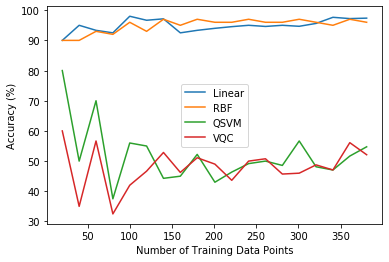

In [113]:
plot_data = np.array(SizeData).astype(float)

x = np.floor(0.67*plot_data[:,0])

plt.plot(x, plot_data[:, 1], label = "Linear")
plt.plot(x, plot_data[:, 2], label = "RBF")
plt.plot(x, plot_data[:, 4], label = "QSVM")
plt.plot(x, plot_data[:, 6], label = "VQC")


plt.xlabel("Number of Training Data Points")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()

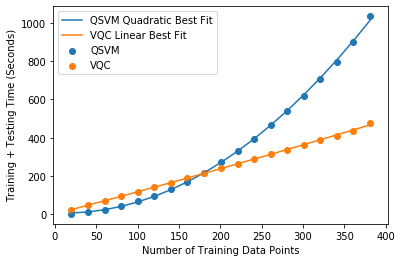

In [114]:
plt.scatter(x, plot_data[:, 3], label = "QSVM")
plt.scatter(x, plot_data[:, 5], label = "VQC")

QSVMFit = np.polyfit(x, plot_data[:, 3], 2)
VQCFit = np.polyfit(x, plot_data[:, 5], 2)
QSVMPoly = np.poly1d(QSVMFit)
VQCPoly = np.poly1d(VQCFit)

plt.plot(x, QSVMPoly(x) , label = "QSVM Quadratic Best Fit")
plt.plot(x, VQCPoly(x), label = "VQC Linear Best Fit")

plt.xlabel("Number of Training Data Points")
plt.ylabel("Training + Testing Time (Seconds)")
plt.legend()
plt.show()

In [127]:
SizeDataScale = []

for i in np.arange(30, 600, 30).tolist():
    print(str(i) + " data points")
    set1, set2 = sampleAnderson(i, standard_scale=True, minmax_scale=True)
    iter_data = compareMethods(set1, set2, name="Anderson_DP"+str(i), include_unscaled=True)
    SizeDataScale.append([len(set1)+len(set2), iter_data[2][3], iter_data[4][3], iter_data[5][2], iter_data[5][3],
                   iter_data[6][2], iter_data[6][3]])

30 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,60.0,False
"SVM, Linear Kernel, scaled",Local Processor,0,60.0,False
"SVM, RBF Kernel",Local Processor,0,50.0,False
"SVM, RBF Kernel, scaled",Local Processor,0,50.0,False
QSVM,qasm_simulator,2,40.0,False
VQC,qasm_simulator,24,40.0,False


60 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,45.0,False
"SVM, Linear Kernel, scaled",Local Processor,0,45.0,False
"SVM, RBF Kernel",Local Processor,0,35.0,False
"SVM, RBF Kernel, scaled",Local Processor,0,40.0,False
QSVM,qasm_simulator,11,55.0,False
VQC,qasm_simulator,48,55.0,False


90 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,53.33,False
"SVM, Linear Kernel, scaled",Local Processor,0,53.33,False
"SVM, RBF Kernel",Local Processor,0,53.33,False
"SVM, RBF Kernel, scaled",Local Processor,0,53.0,False
QSVM,qasm_simulator,25,50.0,False
VQC,qasm_simulator,71,53.33,False


120 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,37.5,False
"SVM, Linear Kernel, scaled",Local Processor,0,45.0,False
"SVM, RBF Kernel",Local Processor,0,47.5,False
"SVM, RBF Kernel, scaled",Local Processor,0,56.99999999999999,False
QSVM,qasm_simulator,43,52.5,False
VQC,qasm_simulator,95,42.5,False


150 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,60.0,False
"SVM, Linear Kernel, scaled",Local Processor,0,54.0,False
"SVM, RBF Kernel",Local Processor,0,56.0,False
"SVM, RBF Kernel, scaled",Local Processor,0,52.0,False
QSVM,qasm_simulator,68,58.0,False
VQC,qasm_simulator,119,58.0,False


180 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,63.33,False
"SVM, Linear Kernel, scaled",Local Processor,0,65.0,False
"SVM, RBF Kernel",Local Processor,0,56.67,False
"SVM, RBF Kernel, scaled",Local Processor,0,56.99999999999999,False
QSVM,qasm_simulator,98,48.33,False
VQC,qasm_simulator,144,55.0,False


210 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,60.0,False
"SVM, Linear Kernel, scaled",Local Processor,0,61.43,False
"SVM, RBF Kernel",Local Processor,0,60.0,False
"SVM, RBF Kernel, scaled",Local Processor,0,64.0,False
QSVM,qasm_simulator,135,62.86,False
VQC,qasm_simulator,168,52.86,False


240 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,61.25,False
"SVM, Linear Kernel, scaled",Local Processor,0,57.5,False
"SVM, RBF Kernel",Local Processor,0,58.75,False
"SVM, RBF Kernel, scaled",Local Processor,0,60.0,False
QSVM,qasm_simulator,166,55.0,False
VQC,qasm_simulator,192,63.75,False


270 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,52.22,False
"SVM, Linear Kernel, scaled",Local Processor,0,57.78,False
"SVM, RBF Kernel",Local Processor,0,47.78,False
"SVM, RBF Kernel, scaled",Local Processor,0,53.0,False
QSVM,qasm_simulator,228,45.56,False
VQC,qasm_simulator,222,60.0,False


300 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,49.0,False
"SVM, Linear Kernel, scaled",Local Processor,0,52.0,False
"SVM, RBF Kernel",Local Processor,0,52.0,False
"SVM, RBF Kernel, scaled",Local Processor,0,56.99999999999999,False
QSVM,qasm_simulator,286,55.0,False
VQC,qasm_simulator,249,56.0,False


330 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,56.36,False
"SVM, Linear Kernel, scaled",Local Processor,0,56.36,False
"SVM, RBF Kernel",Local Processor,0,63.64,False
"SVM, RBF Kernel, scaled",Local Processor,0,65.0,False
QSVM,qasm_simulator,342,51.82,False
VQC,qasm_simulator,271,53.64,False


360 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,51.67,False
"SVM, Linear Kernel, scaled",Local Processor,0,52.5,False
"SVM, RBF Kernel",Local Processor,0,54.17,False
"SVM, RBF Kernel, scaled",Local Processor,0,62.0,False
QSVM,qasm_simulator,410,52.5,False
VQC,qasm_simulator,296,56.67,False


390 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,56.15,False
"SVM, Linear Kernel, scaled",Local Processor,0,56.15,False
"SVM, RBF Kernel",Local Processor,0,65.38,False
"SVM, RBF Kernel, scaled",Local Processor,0,65.0,False
QSVM,qasm_simulator,472,53.85,False
VQC,qasm_simulator,318,56.92,False


420 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,55.71,False
"SVM, Linear Kernel, scaled",Local Processor,0,54.29,False
"SVM, RBF Kernel",Local Processor,0,57.86,False
"SVM, RBF Kernel, scaled",Local Processor,0,64.0,False
QSVM,qasm_simulator,558,50.0,False
VQC,qasm_simulator,344,53.57,False


450 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,60.0,False
"SVM, Linear Kernel, scaled",Local Processor,0,60.0,False
"SVM, RBF Kernel",Local Processor,0,59.33,False
"SVM, RBF Kernel, scaled",Local Processor,0,59.0,False
QSVM,qasm_simulator,638,56.67,False
VQC,qasm_simulator,368,52.0,False


480 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,55.0,False
"SVM, Linear Kernel, scaled",Local Processor,0,55.0,False
"SVM, RBF Kernel",Local Processor,0,57.5,False
"SVM, RBF Kernel, scaled",Local Processor,0,52.0,False
QSVM,qasm_simulator,730,52.5,False
VQC,qasm_simulator,393,52.5,False


510 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,58.82,False
"SVM, Linear Kernel, scaled",Local Processor,0,57.65,False
"SVM, RBF Kernel",Local Processor,0,58.82,False
"SVM, RBF Kernel, scaled",Local Processor,0,59.0,False
QSVM,qasm_simulator,854,54.71,False
VQC,qasm_simulator,435,52.35,False


540 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,52.22,False
"SVM, Linear Kernel, scaled",Local Processor,0,52.78,False
"SVM, RBF Kernel",Local Processor,0,62.78,False
"SVM, RBF Kernel, scaled",Local Processor,0,62.0,False
QSVM,qasm_simulator,960,51.67,False
VQC,qasm_simulator,459,50.56,False


570 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,55.79,False
"SVM, Linear Kernel, scaled",Local Processor,0,56.32,False
"SVM, RBF Kernel",Local Processor,0,58.95,False
"SVM, RBF Kernel, scaled",Local Processor,0,60.0,False
QSVM,qasm_simulator,1066,54.21,False
VQC,qasm_simulator,485,50.53,False


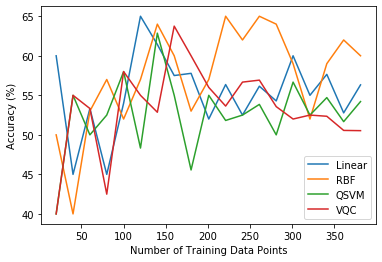

In [128]:
plot_data = np.array(SizeDataScale).astype(float)

x = np.floor(0.67*plot_data[:,0])

plt.plot(x, plot_data[:, 1], label = "Linear")
plt.plot(x, plot_data[:, 2], label = "RBF")
plt.plot(x, plot_data[:, 4], label = "QSVM")
plt.plot(x, plot_data[:, 6], label = "VQC")


plt.xlabel("Number of Training Data Points")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()

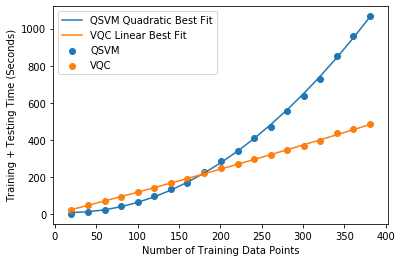

In [129]:
plt.scatter(x, plot_data[:, 3], label = "QSVM")
plt.scatter(x, plot_data[:, 5], label = "VQC")

QSVMFit = np.polyfit(x, plot_data[:, 3], 2)
VQCFit = np.polyfit(x, plot_data[:, 5], 2)
QSVMPoly = np.poly1d(QSVMFit)
VQCPoly = np.poly1d(VQCFit)

plt.plot(x, QSVMPoly(x) , label = "QSVM Quadratic Best Fit")
plt.plot(x, VQCPoly(x), label = "VQC Linear Best Fit")

plt.xlabel("Number of Training Data Points")
plt.ylabel("Training + Testing Time (Seconds)")
plt.legend()
plt.show()